In [1]:
import numpy as np
import spec_flats as sf
import matplotlib.pyplot as plt

## Initialize butler and set up observation year to find flats 

In [2]:
#repo = '/repo/embargo_old'
#repo = '/repo/embargo'
repo = '/sdf/group/rubin/repo/main'
#calibCollections=['LATISS/calib/legacy','LATISS/raw/all']
calibCollections=['LATISS/calib','LATISS/raw/all']
obs_year = 2024
filter_ = 'empty'
disperser = 'empty'

In [3]:
outdir = '/home/m/monroy/rubin-user/spec_flats/wl_dependence/outputs/'
if os.path.exists(outdir)==False:
    os.mkdir(outdir)

In [4]:
flat_dates, flat_ids, butler = sf.find_flat_dates(obs_year=obs_year,filter=filter_,disperser=disperser,repo=repo,calibCollections=calibCollections)

In [5]:
flat_dates

array([20240129, 20240131, 20240207, 20240212, 20240216, 20240219,
       20240220, 20240221, 20240222, 20240223, 20240227, 20240228,
       20240301, 20240303, 20240305, 20240306, 20240308, 20240311,
       20240326, 20240327, 20240328, 20240329, 20240401, 20240402,
       20240403, 20240404, 20240408, 20240409, 20240410, 20240415,
       20240416, 20240417, 20240419, 20240422, 20240423, 20240424,
       20240429, 20240524, 20240527, 20240528, 20240529, 20240530,
       20240603, 20240611, 20240618, 20240619, 20240624, 20240625,
       20240626, 20240627, 20240703, 20240708, 20240709, 20240716,
       20240717, 20240722, 20240723, 20240724, 20240726, 20240730,
       20240801, 20240806, 20240807, 20240812, 20240813, 20240814,
       20240819, 20240820, 20240821, 20240827, 20240902, 20240903,
       20240909, 20240910, 20240911, 20240912, 20240916, 20240917,
       20240923, 20240924, 20241002, 20241009, 20241014, 20241015])

In [6]:
#flat_ids

### Find closest date 

In [7]:
closest_date, closest_ids = sf.find_closest_date(20240417,flat_ids)

Requested observation date =  20240417
Closest date available =  20240417
Corresponding flat IDs =  [2024041700165 2024041700166 2024041700167 2024041700168 2024041700169
 2024041700170 2024041700171 2024041700172 2024041700173 2024041700174
 2024041700175 2024041700176 2024041700177 2024041700178 2024041700179
 2024041700180 2024041700181 2024041700182 2024041700183 2024041700184
 2024041700185]


### Check that the flats of a given date can be loaded 

In [8]:
sf.check_flats(closest_ids,return_flats=False,butler=butler)

Inspecting flats
All flats are equal


### Select a flat by ID and plot it 

In [9]:
#2024-04
#flat_id0 = 2024041700090 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSSr_65mm
#flat_id0 = 2024041700119 #SDSSz_65mm
flat_id0 = 2024041700177 #empty
#2024-08
#flat_id0 = 2024080700162 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSSr_65mm
#flat_id0 = 2024041700119 #SDSSz_65mm
#flat_id0 = 2025010900127 #empty

In [10]:
assert flat_id0 in closest_ids

In [11]:
flat_array_ = sf.get_flat_array(flat_id0,butler=butler)

Flat 2024041700177 properly loaded


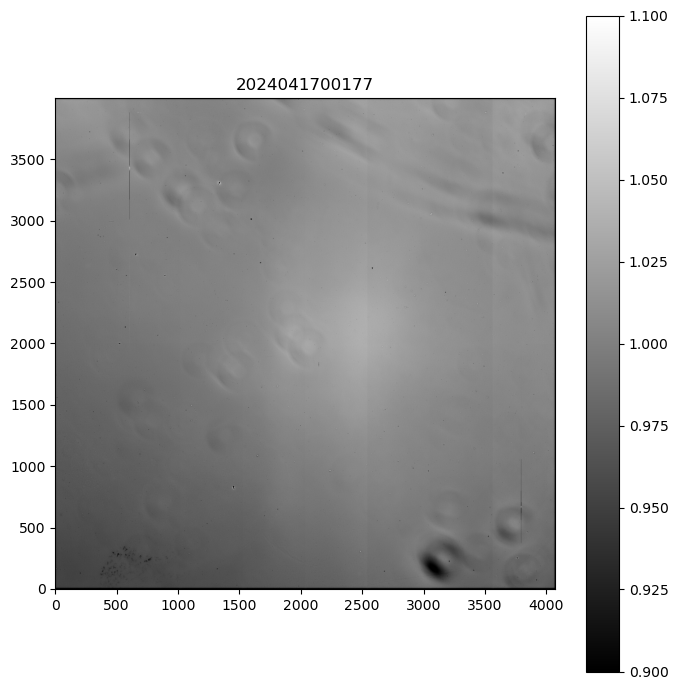

In [12]:
sf.plot_flat(flat_array_,title=flat_id0)

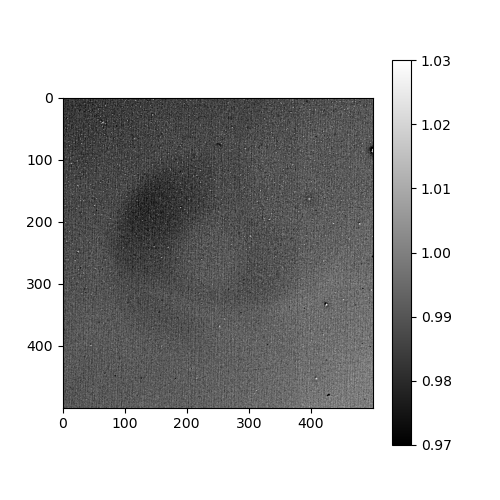

In [13]:
sub_flat = flat_array_[1000:1500,1150:1650]
%matplotlib widget
fig,axs = plt.subplots(1,1,figsize=(5,5))
im = axs.imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
plt.colorbar(im,ax=axs)

In [14]:
sub_flat_norm = (sub_flat-np.min(sub_flat))/(np.max(sub_flat)-np.min(sub_flat))

In [15]:
from matplotlib.colors import LogNorm

In [16]:
np.min(sub_flat),np.max(sub_flat)

(np.float32(0.2755177), np.float32(1.4942698))

In [17]:
np.min(sub_flat_norm),np.max(sub_flat_norm)

(np.float32(0.0), np.float32(1.0))

In [28]:
%matplotlib widget
fig,axs = plt.subplots(1,1,figsize=(5,5))
im = axs.imshow(sub_flat_norm,vmin=0.5,vmax=0.75,cmap='gray')
plt.colorbar(im,ax=axs)

In [19]:
%matplotlib inline

In [20]:
dft = np.fft.fft2(sub_flat)
#dft = np.fft.fft2(sub_flat_norm)
dft_shift = np.fft.fftshift(dft)

In [21]:
import cv2

In [22]:
magnitude = 20.*np.log(np.abs(dft_shift))
magnitude_normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [24]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

im = axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
plt.colorbar(im,ax=axs[0])
#axs[1].imshow(np.abs(dft_shift))
im = axs[1].imshow(magnitude,vmin=0,vmax=100,cmap='gray')
plt.colorbar(im,ax=axs[1])

In [25]:
np.min(20.*np.log(np.abs(dft_shift))),np.max(20.*np.log(np.abs(dft_shift)))

(np.float32(-87.820015), np.float32(248.38486))

In [26]:
idft_shift = np.fft.ifftshift(dft_shift)
idft = np.fft.ifft2(idft_shift)
idft = np.abs(idft)

In [27]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
axs[1].imshow(idft,vmin=0.97,vmax=1.03,cmap='gray')

(array([9.50000e+01, 9.99000e+02, 5.16000e+03, 2.18980e+04, 4.48460e+04,
        1.29905e+05, 3.43600e+04, 1.01140e+04, 2.32400e+03, 2.99000e+02]),
 array([-4.76837158e-07, -4.05311596e-07, -3.33786005e-07, -2.62260414e-07,
        -1.90734852e-07, -1.19209290e-07, -4.76836988e-08,  2.38418920e-08,
         9.53674544e-08,  1.66893017e-07,  2.38418579e-07]),
 <BarContainer object of 10 artists>)

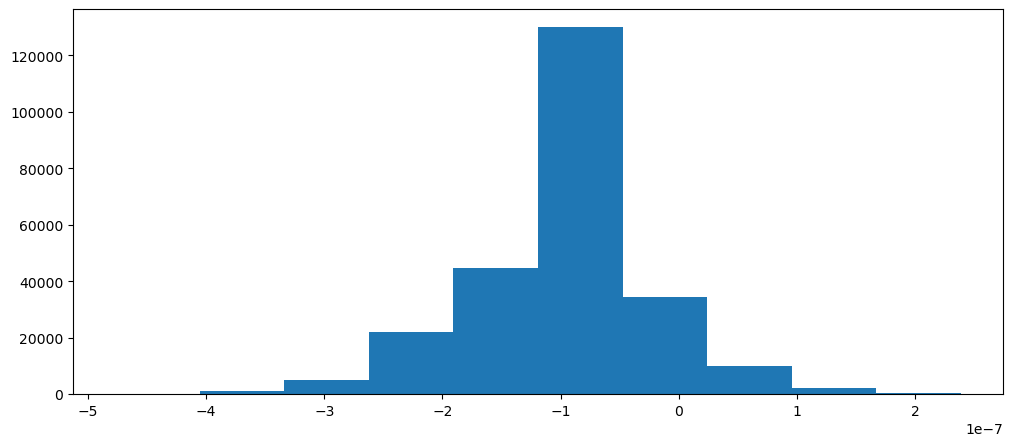

In [28]:
fig,axs = plt.subplots(1,1,figsize=(12,5))

#axs.imshow(sub_flat-idft,vmin=0.97,vmax=1.03,cmap='gray')
axs.hist(sub_flat.flatten()-idft.flatten())

In [29]:
np.finfo

numpy.finfo

31


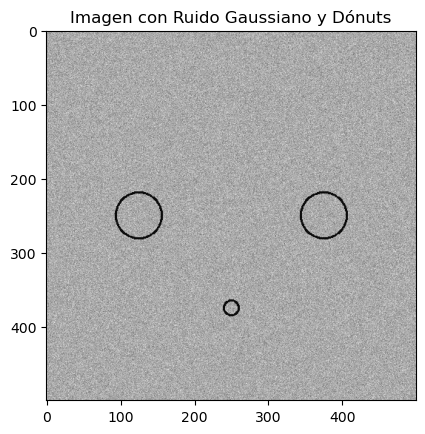

In [57]:
# Tamaño de la imagen
size = 500

# Crear una imagen con ruido gaussiano centrado alrededor de 1
mean = 1.0
std_dev = 0.1
noisy_image = np.random.normal(mean, std_dev, (size, size))

# Asegurarse de que no haya valores negativos
noisy_image = np.maximum(noisy_image, 0)

# Crear una máscara para los dónuts
mask = np.ones((size, size))
center1 = (size // 4, size // 2)
center2 = (3 * size // 4, size // 2)
center3 = (size//2,3*size//4)
radius = size // 16
radius2 = 10
thickness = 2
thickness2 = 2

print(radius)

# Dibujar los dónuts en la máscara
cv2.circle(mask, center1, radius, 0, thickness)
cv2.circle(mask, center2, radius, 0, thickness)
cv2.circle(mask, center3, radius2, 0, thickness2)

# Reducir la intensidad de los píxeles dentro de los dónuts en un 10%
image_with_donuts = noisy_image * mask + noisy_image * (1 - mask) * 0.2

# Visualizar la imagen resultante
plt.imshow(image_with_donuts, cmap='gray')
plt.title('Imagen con Ruido Gaussiano y Dónuts')
#plt.xticks([]), plt.yticks([])
plt.show()


In [33]:
dft = np.fft.fft2(image_with_donuts)
dft_shift = np.fft.fftshift(dft)

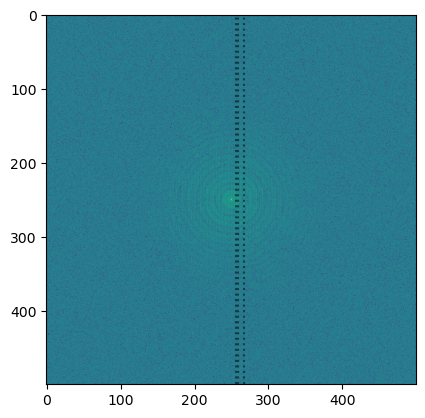

In [34]:
plt.imshow(20*np.log(np.abs(dft_shift)))
plt.axvline(x=256,ls=':',color='k',alpha=0.5)
plt.axvline(x=int(size/2)+512/(2*radius),ls=':',color='k',alpha=0.5)
plt.axvline(x=int(size/2)+2*512/(2*radius),ls=':',color='k',alpha=0.5)
#plt.xlim(210,300)
#plt.ylim(210,300)

In [35]:
512/(2*radius)

8.258064516129032

In [36]:
plt.plot(np.arange(size),20.*np.log(dft_shift[int(size/2)]))
plt.axvline(x=int(size/2),ls=':',color='k',alpha=0.5)
plt.axvline(x=int(size/2)+512/(2*radius2),ls=':',color='k',alpha=0.5)
plt.axvline(x=int(size/2)-512/(2*radius2),ls=':',color='k',alpha=0.5)
plt.xlim(190,320)

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(190.0, 320.0)

In [37]:
k_radius = int(size/(radius*2.))
k1 = int(size/((radius-thickness/2)*2))
k2 = int(size/((radius+thickness/2)*2))
#k2 = 1
k_thickness = int(k1-k2)
k1,k2,k_radius,k_thickness

(8, 7, 8, 1)

In [38]:
ccol = int(size/2)
crow = int(size/2)
mask_fourier = np.ones((size,size),np.uint8)

In [39]:
# Parámetros del anillo
inner_radius = k2
outer_radius = k1


In [40]:
# Crear una máscara de anillo
x, y = np.meshgrid(np.linspace(-1*int(size/2), int(size/2), size), np.linspace(-1*int(size/2), int(size/2), size))
d = np.sqrt(x**2 + y**2)

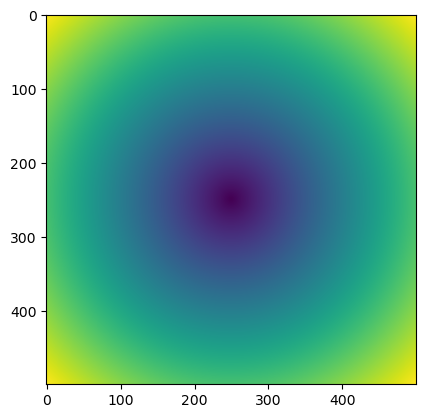

In [41]:
plt.imshow(d)

In [42]:
# Parámetros del filtro de Butterworth
D0 =25*k_radius  # Frecuencia de corte
n_up = 3  # Orden del filtro
n_down = 2

# Máscara de Butterworth
mask_fourier_up = 1 / (1 + (D0/d)**(2 * n_up))
mask_fourier_down = 1 / (1 + (d/D0)**(2 * n_down))

mask_fourier = mask_fourier_up

mask_fourier[int(size/2),int(size/2)] = 1

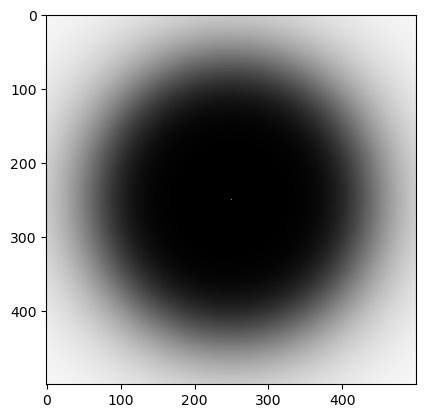

In [43]:
plt.imshow(mask_fourier,cmap='gray')

In [44]:
dft_shift_masked = dft_shift*mask_fourier

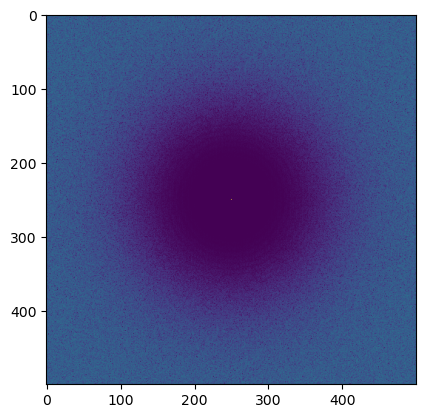

In [45]:
plt.imshow(20*np.log(np.abs(dft_shift_masked)+1.))

In [46]:
idft_shift = np.fft.ifftshift(dft_shift_masked)
idft_filter = np.abs(np.fft.ifft2(idft_shift))

In [47]:
mean_0 = np.average(image_with_donuts)
mean_after = np.average(idft_filter)
print(mean_0,mean_after)

median_0 = np.median(image_with_donuts)
median_after = np.median(idft_filter)
print(median_0,median_after)

std_0 = np.std(image_with_donuts)
std_after = np.std(idft_filter)

q1_0 = np.percentile(image_with_donuts,25)
q3_0 = np.percentile(image_with_donuts,75)
iqr_0 = q3_0-q1_0

q1_after = np.percentile(idft_filter,25)
q3_after = np.percentile(idft_filter,75)
iqr_after = q3_after-q1_after

# Calcular el factor de reescalado para ajustar la media a 1.0
idft_filter_norm = (idft_filter-median_after)/iqr_after
idft_filter_norm = idft_filter_norm*iqr_0+median_0


0.9956994034263473 0.9956994344565041
0.9993290822061598 0.9955800837468509


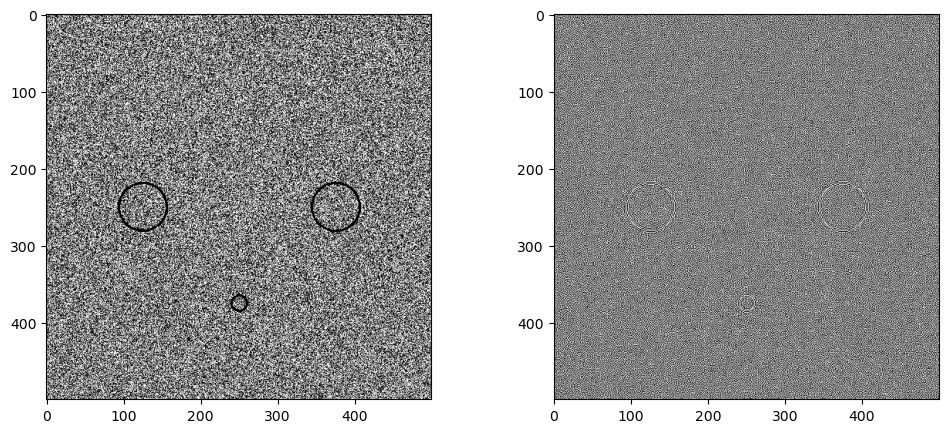

In [48]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

axs[0].imshow(image_with_donuts,vmin=0.9,vmax=1.1,cmap='gray')
axs[1].imshow(idft_filter_norm,vmin=0.9,vmax=1.1,cmap='gray')

(80.0, 170.0)

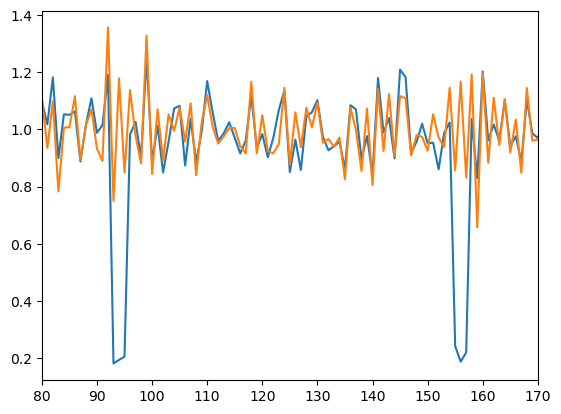

In [49]:
plt.plot(np.arange(int(size/2)),image_with_donuts[int(size/2),:int(size/2)])
plt.plot(np.arange(int(size/2)),idft_filter_norm[int(size/2),:int(size/2)])
plt.xlim(80,170)

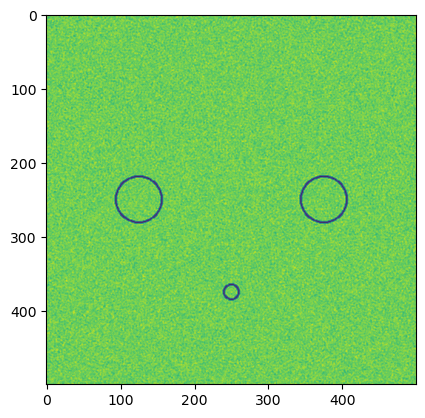

In [47]:
plt.imshow(image_with_donuts-idft_filter_norm)

In [48]:
np.average(image_with_donuts),np.average(idft_filter_norm)

(np.float64(0.9954755458049395), np.float64(0.9993377856737385))

In [49]:
np.std(image_with_donuts),np.std(idft_filter_norm)

(np.float64(0.11604157118959212), np.float64(0.10162753462639873))

## Now we use the auxtel_flat class 

### We create an auxtel_flat object for a given flat ID 
We can reuse the butler that we initialized above or set up a different one 

In [50]:
myflat = sf.auxtel_flat(flat_id0,butler=butler)

In [51]:
myflat.flat_array

array([[0.53261137, 0.5218164 , 0.51592493, ..., 0.53400564, 0.5375086 ,
        0.5509224 ],
       [0.68747383, 0.6848589 , 0.6835276 , ..., 0.6884202 , 0.69494134,
        0.6908289 ],
       [0.74667263, 0.7571097 , 0.75711197, ..., 0.7621511 , 0.7725817 ,
        0.7493886 ],
       ...,
       [0.80247664, 0.80738056, 0.8149901 , ..., 0.8246341 , 0.8053092 ,
        0.79714435],
       [0.7303134 , 0.73359483, 0.7336715 , ..., 0.74042547, 0.74627215,
        0.73548347],
       [0.5757691 , 0.566827  , 0.5558483 , ..., 0.5701016 , 0.5729723 ,
        0.590216  ]], shape=(4000, 4072), dtype=float32)

### Plot flat with plot_flat() method 

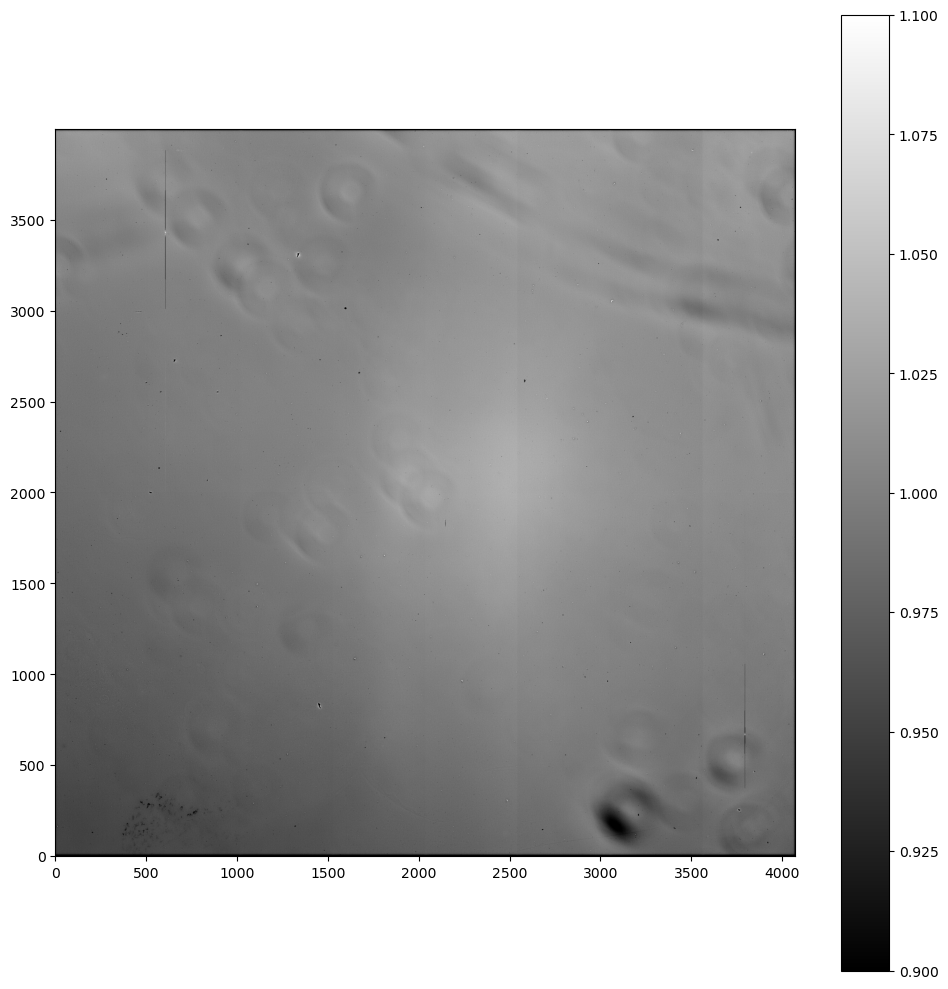

In [52]:
myflat.plot_flat()

In [50]:
dft = np.fft.fft2(sub_flat)
#dft = np.fft.fft2(sub_flat_norm)
dft_shift = np.fft.fftshift(dft)

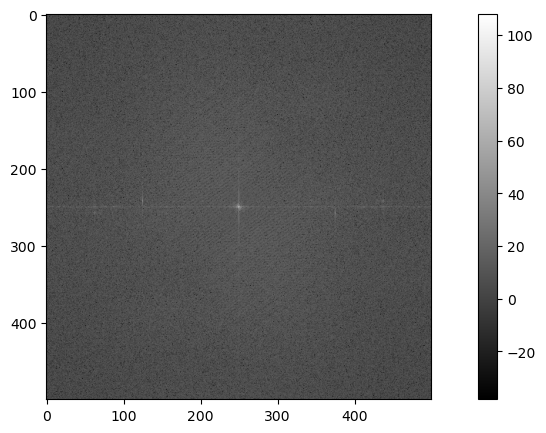

In [51]:
fig,axs = plt.subplots(1,1,figsize=(12,5))

im = axs.imshow(20.*np.log10(np.abs(dft_shift)),cmap='gray')
plt.colorbar(im,ax=axs)

In [52]:
dft_shift_masked = dft_shift*mask_fourier

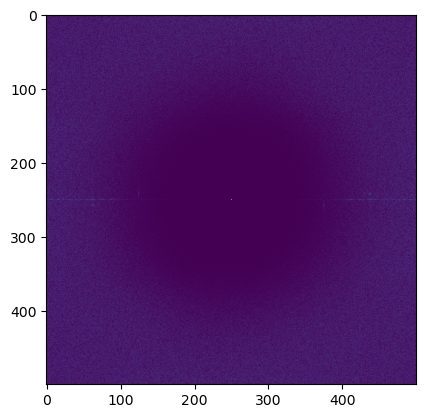

In [53]:
plt.imshow(20*np.log(np.abs(dft_shift_masked)+1.))

In [54]:
idft_shift = np.fft.ifftshift(dft_shift_masked)
idft_filter = np.abs(np.fft.ifft2(idft_shift))

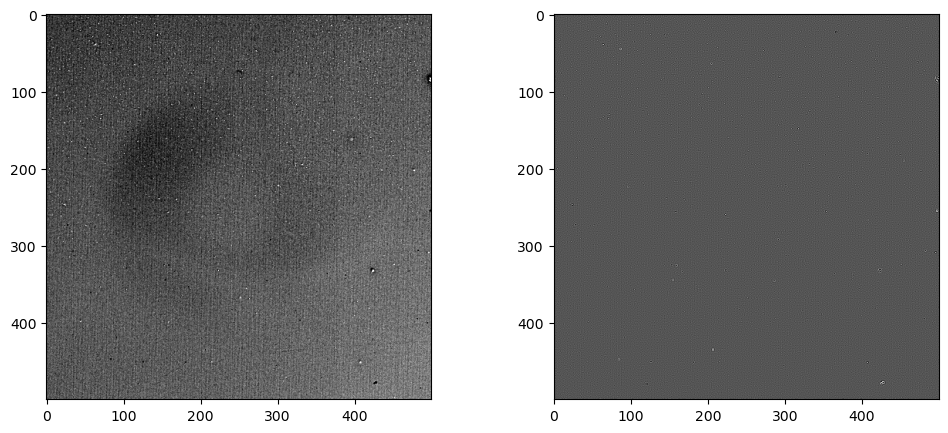

In [55]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
axs[1].imshow(idft_filter,vmin=0.97,vmax=1.03,cmap='gray')

### Check some atributes of the auxtel_flat object 

In [59]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [60]:
myflat.amplis_coords

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [61]:
myflat.amplis

['C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C07',
 'C06',
 'C05',
 'C04',
 'C03',
 'C02',
 'C01',
 'C00']

### Now we select our implifiers of interest 

In [62]:
myflat.select_amplis('C12')

In [63]:
myflat.amplis

['C12']

In [64]:
myflat.amplis_coords

{'C12': (1018, 1527, 2000, 4000)}

In [65]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [66]:
flat_ft = np.fft.fft2(myflat.flat_array)
flat_ft_shift = np.fft.fftshift(flat_ft)

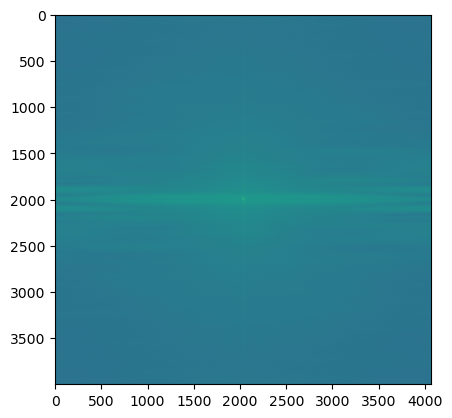

In [67]:
plt.imshow(20*np.log(np.abs(flat_ft_shift)))
#plt.axvline(x=256,ls=':',color='k',alpha=0.5)
#plt.axvline(x=int(size/2)+512/(2*radius),ls=':',color='k',alpha=0.5)
#plt.axvline(x=int(size/2)+2*512/(2*radius),ls=':',color='k',alpha=0.5)

In [88]:
flat_ft_shift.shape

(4000, 4072)

In [68]:
flat_ft_masked = flat_ft_shift*mask_fourier

ValueError: operands could not be broadcast together with shapes (4000,4072) (500,500) 

### We create a smoothed flat 

This is independent of the normalizing step, that is, we can do it even if we haven't done myflat.normalize_flat(), it will be done internally by default (normalize = True, very fast operation) 

In [69]:
myflat.smooth_flat(window_size=20,mode='mirror',normalize=True,norm='median')

Window size for median smoothing = 20
ATTENTION: doing median smoothing on each amplifier SEPARATELY
Smoothing with median filter
Smoothing amplifier C10
Smoothing amplifier C11
Smoothing amplifier C12
Smoothing amplifier C13
Smoothing amplifier C14
Smoothing amplifier C15
Smoothing amplifier C16
Smoothing amplifier C17
Smoothing amplifier C07
Smoothing amplifier C06
Smoothing amplifier C05
Smoothing amplifier C04
Smoothing amplifier C03
Smoothing amplifier C02
Smoothing amplifier C01
Smoothing amplifier C00
Time for smoothing = 89.1027s


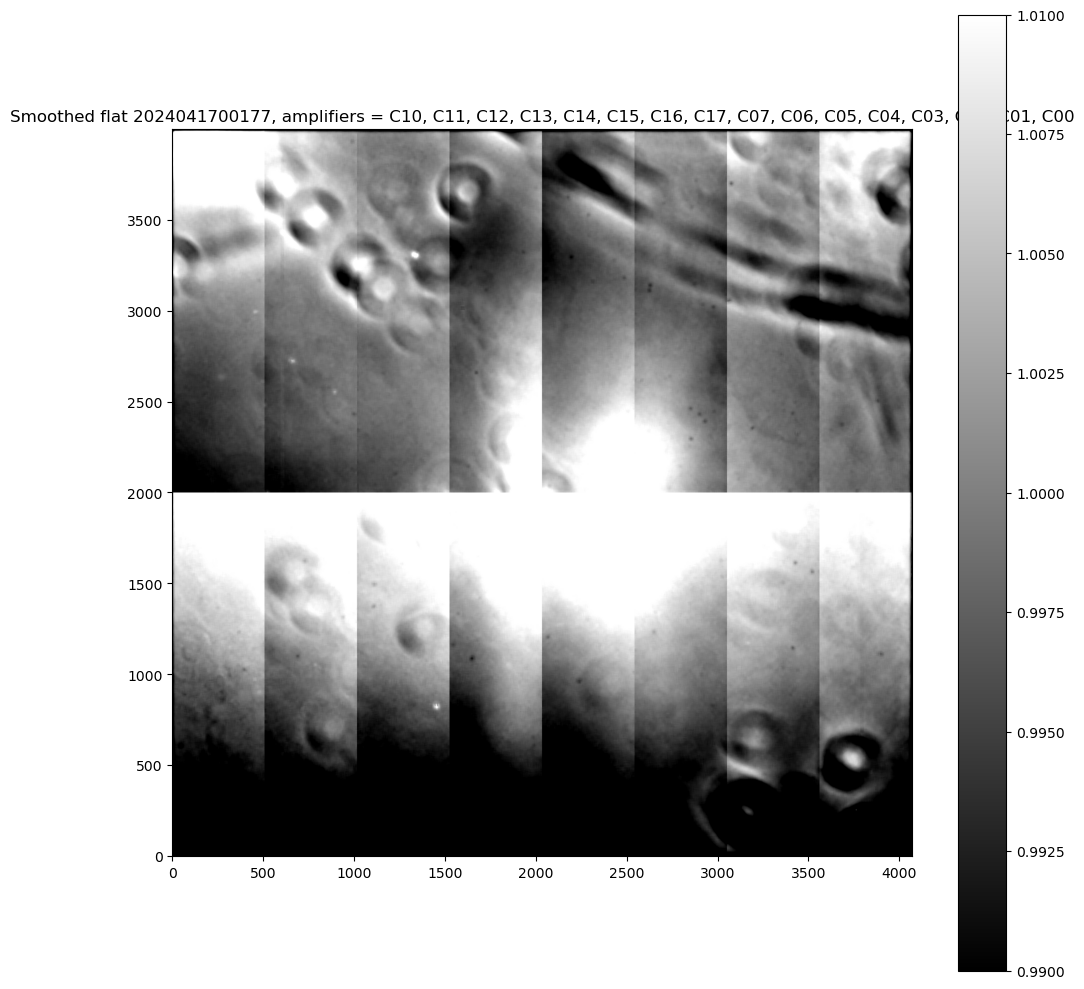

In [68]:
%matplotlib inline
myflat.plot_flat(show="smooth",vmin=0.99,vmax=1.01)

In [22]:
myflat.smooth_array

array([[0.98659402, 0.98659402, 0.98655019, ..., 0.98944478, 0.98945126,
        0.98946908],
       [0.98659402, 0.98659402, 0.98655019, ..., 0.98944478, 0.98945126,
        0.98946908],
       [0.98654955, 0.98654955, 0.986501  , ..., 0.98941443, 0.98942897,
        0.98945249],
       ...,
       [1.0024775 , 1.0024775 , 1.00245625, ..., 0.99982752, 0.99988408,
        0.99983743],
       [1.00252033, 1.00252033, 1.00251591, ..., 0.99987667, 0.99993913,
        0.99988799],
       [1.00252154, 1.00252154, 1.00252531, ..., 0.99990878, 0.99997513,
        0.99993042]])

In [32]:
ws = [10,20,30,40,50]

In [33]:
'''
for ws_ in ws:
    myflat.smooth_flat(window_size=ws_)
    sf.plot_flat(myflat.smooth_array,vmin=0.97,vmax=1.03)
'''

'\nfor ws_ in ws:\n    myflat.smooth_flat(window_size=ws_)\n    sf.plot_flat(myflat.smooth_array,vmin=0.97,vmax=1.03)\n'

### Finally, we can create a spectroscopy or *special* flat 

This is also independent of the steps above: if myflat.smooth_array was not generated with myflat.smooth_flat, it will be done internally 

In [30]:
myflat.special_flat(window_size=10)

ATTENTION: Current smoothed flat has window_size = 20. Creating it with window size = 10
Window size for mean smoothing = 10
Smoothing with mean filter
Masking outliers beyond 1.00 and 99.00 percentiles
Time for smoothing = 0.7888s
Window size for mean smoothing = 10
Window size for mean smoothing = 10
Using previously created smooth array


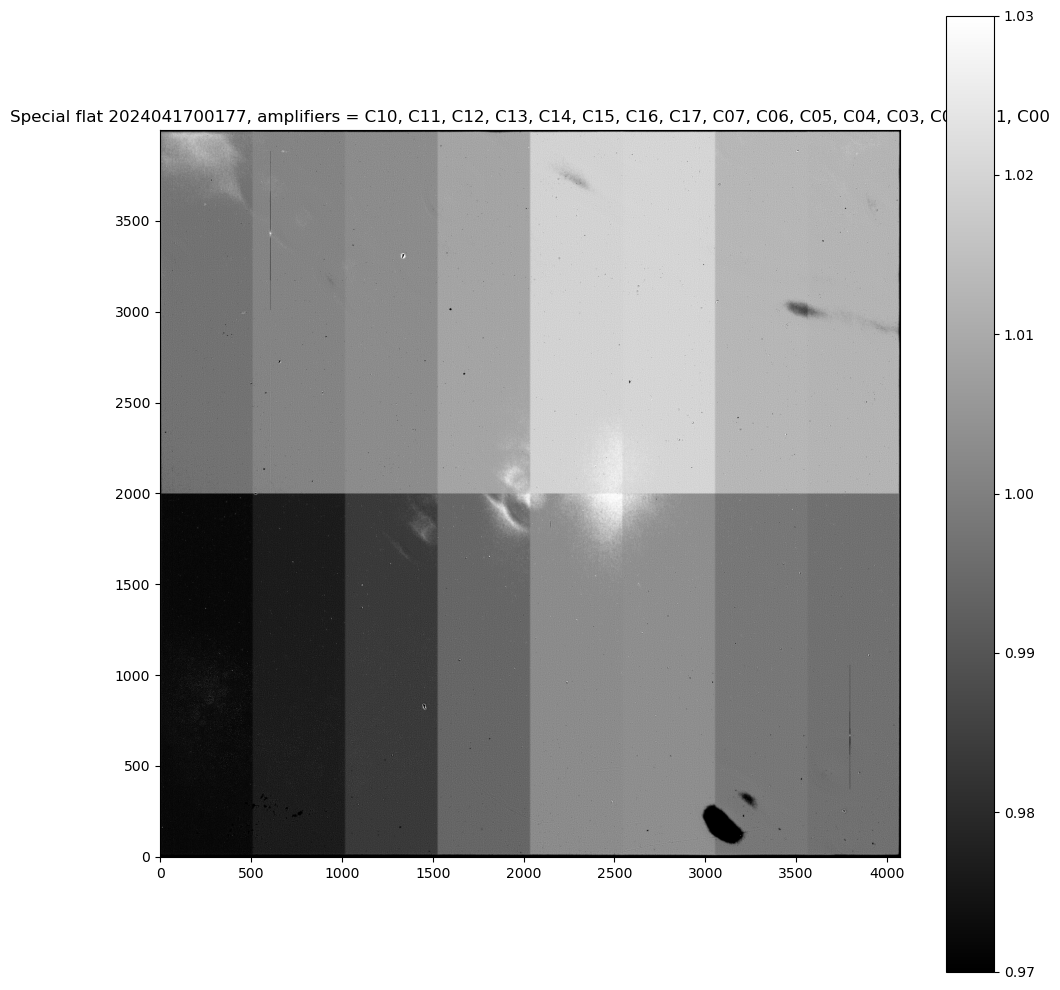

In [31]:
myflat.plot_flat(show="special",vmin=0.97,vmax=1.03)